<a href="https://colab.research.google.com/github/juliethMZ/analisis-accidentes-laborales/blob/main/Notebook_analisis_accidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [60]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import pandas as pd

# GitHub raw file URL
url = 'https://raw.githubusercontent.com/juliethMZ/analisis-accidentes-laborales/refs/heads/main/data/dataset_accidentes_sucia.csv'

# Read CSV from GitHub
df = pd.read_csv(url)

# Preview data
df.head()



,Año,Región,Sector Económico,Empresa,Número de Accidentes
0,2020,Andina,Transporte,Salud Total,25
1,2022,Pacífica,Construcción,Prosegur,60
2,2022,Andina,NaN,Educando SAS,40
3,2021,Andina,Agroindustria,Mineralco,56
4,2021,Caribe,Educación,Educando SAS,28


# **INITIAL EXPLORATION DF**
- Data Profiling
- Initial Inspection
- Understanding the shape and structure

In [62]:
df.shape

(310, 5)

In [63]:
df.columns

Index(['Año', 'Región', 'Sector Económico', 'Empresa', 'Número de Accidentes'], dtype='object')

In [64]:
df.dtypes

,0
Año,int64
Región,object
Sector Económico,object
Empresa,object
Número de Accidentes,int64


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Año                   310 non-null    int64 
 1   Región                295 non-null    object
 2   Sector Económico      295 non-null    object
 3   Empresa               295 non-null    object
 4   Número de Accidentes  310 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 12.2+ KB


In [66]:
# View basic statistics (for numeric columns only)
df.describe()

,Año,Número de Accidentes
count,310.000000,310.000000
mean,2021.422581,37.587097
std,1.060686,44.686001
min,2020.000000,5.000000
25%,2020.000000,20.000000
50%,2022.000000,32.000000
75%,2022.000000,47.000000
max,2023.000000,500.000000


In [67]:
# View unique values ​​by categorical column (e.g. Region, Sector, Company)
df['Región'].unique()

array(['Andina', 'Pacífica', 'Caribe', nan, 'Orinoquía', 'Amazonía'],
      dtype=object)

In [68]:
df['Sector Económico'].unique()

array(['Transporte', 'Construcción', nan, 'Agroindustria', 'Educación',
       'Manufactura', 'Minería', 'Salud', 'Educaci0n', 'minería',
       'AGROINDUSTRIA', 'Transp0rte', ' Salud'], dtype=object)

In [69]:
df['Empresa'].unique()

array(['Salud Total', 'Prosegur', 'Educando SAS', 'Mineralco',
       'TransCaribe', 'Colsalud S.A.', nan, 'AgroCampo', 'Ferroandes',
       'Logística Express', 'Concretos del Valle'], dtype=object)

# **DATA CLEANING**
- Missing Values
- Duplicates
- Outliers
- String Cleaning
- Standardization

In [70]:
# Validación de datos duplicados
# Count duplicated row
df.duplicated().sum()

# Show duplicated rows (if any)
df[df.duplicated()]

,Año,Región,Sector Económico,Empresa,Número de Accidentes
300,2022,Pacífica,Salud,Educando SAS,17
301,2021,Andina,Agroindustria,Concretos del Valle,6
302,2020,Caribe,Transporte,Colsalud S.A.,41
304,2022,Caribe,Manufactura,Concretos del Valle,39
305,2021,Pacífica,Salud,Ferroandes,51
306,2021,Pacífica,Construcción,Mineralco,36
307,2021,Andina,Agroindustria,Mineralco,12
308,2022,Caribe,Educación,TransCaribe,33
309,2023,Pacífica,Salud,Prosegur,51


In [71]:
# revisión de Outliers
# Quick stats to detect extremes
df.describe()

# Sort by number of accidents (check for very high values)
df.sort_values(by="Número de Accidentes", ascending=False).head(10)


,Año,Región,Sector Económico,Empresa,Número de Accidentes
120,2021,Pacífica,Agroindustria,Educando SAS,500
185,2021,Pacífica,Agroindustria,Mineralco,400
70,2020,Caribe,Transporte,Ferroandes,310
78,2020,Pacífica,Salud,TransCaribe,300
244,2021,Caribe,Minería,Logística Express,250
252,2022,Orinoquía,Minería,Salud Total,60
217,2023,Orinoquía,Educación,Ferroandes,60
137,2020,Caribe,Construcción,AgroCampo,60
1,2022,Pacífica,Construcción,Prosegur,60
102,2021,Caribe,Agroindustria,Colsalud S.A.,59


In [72]:
# Ver registros con más de 200 accidentes
df[df["Número de Accidentes"] > 200]

,Año,Región,Sector Económico,Empresa,Número de Accidentes
70,2020,Caribe,Transporte,Ferroandes,310
78,2020,Pacífica,Salud,TransCaribe,300
120,2021,Pacífica,Agroindustria,Educando SAS,500
185,2021,Pacífica,Agroindustria,Mineralco,400
244,2021,Caribe,Minería,Logística Express,250


In [74]:
# See all unique values in the "Sector Económico" column
df["Sector Económico"].unique()

array(['Transporte', 'Construcción', nan, 'Agroindustria', 'Educación',
       'Manufactura', 'Minería', 'Salud', 'Educaci0n', 'minería',
       'AGROINDUSTRIA', 'Transp0rte', ' Salud'], dtype=object)

In [75]:
# Remove spaces and unify text style
df["Sector Económico"] = df["Sector Económico"].str.strip().str.capitalize()

# Replace common typos or inconsistencies
df["Sector Económico"] = df["Sector Económico"].replace({
    "Transp0rte": "Transporte",
    "Educaci0n": "Educación",
    "Minería": "Minería",
    "Agroindustria": "Agroindustria"
})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Año                   310 non-null    int64 
 1   Región                295 non-null    object
 2   Sector Económico      295 non-null    object
 3   Empresa               295 non-null    object
 4   Número de Accidentes  310 non-null    int64 
 5   High Alert            310 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.7+ KB


In [77]:
df['Sector Económico'].unique()

array(['Transporte', 'Construcción', nan, 'Agroindustria', 'Educación',
       'Manufactura', 'Minería', 'Salud'], dtype=object)

In [78]:
#Visualización de valores Nan en las columnas "Región", "Sector Económico", "Empresa"
# Before cleaning: check missing values
df.isnull().sum()

,0
Año,0
Región,15
Sector Económico,15
Empresa,15
Número de Accidentes,0
High Alert,0


In [79]:
# Porcentaje de valores nulos por columna
#  5% de los registros tienen valores nulos en esas tres columnas.

(df.isnull().sum() / len(df)) * 100

,0
Año,0.00000
Región,4.83871
Sector Económico,4.83871
Empresa,4.83871
Número de Accidentes,0.00000
High Alert,0.00000


In [80]:
# Reemplazar valores Nan por Desconocido
df["Región"].fillna("Desconocido", inplace=True)
df["Sector Económico"].fillna("Desconocido", inplace=True)
df["Empresa"].fillna("Desconocido", inplace=True)

<ipython-input-80-802ecb4d0ea8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Región"].fillna("Desconocido", inplace=True)
<ipython-input-80-802ecb4d0ea8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [81]:
# Final validation of missing values after cleaning
#After replacing missing values with 'Desconocido', we validate that no nulls remain in the dataset.
df.isnull().sum()

,0
Año,0
Región,0
Sector Económico,0
Empresa,0
Número de Accidentes,0
High Alert,0


# **DATA TRANSFORMATION**

- Feature Engineering
- Data Enrichment
- Data type conversion

In [108]:
#feature engineering - creación de nueva columna para separar los outliers
df["High Alert"] = df["Número de Accidentes"].apply(lambda x: "Yes" if x > 200 else "No")

In [109]:
df["High Alert"].value_counts()
#5 filas con 1 alerta

,count
High Alert,
No,305
Yes,5


In [110]:
# Filter only the cases with a high alert (more than 200 accidents)
# devuelve solo los registros que tienen 1en la columna."High Alert"
critical_cases = df[df["High Alert"] == 1]

In [111]:
# Display critical records
critical_cases.head()


,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,High Alert Label


In [124]:
# Filtra directamente las filas donde el # de acc > 200
outliers = df[df["Número de Accidentes"] > 200]
outliers

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,critical_zone
70,2020,Caribe,Transporte,Ferroandes,310,Yes,Critical,No
78,2020,Pacífica,Salud,TransCaribe,300,Yes,Critical,No
120,2021,Pacífica,Agroindustria,Educando SAS,500,Yes,Critical,No
185,2021,Pacífica,Agroindustria,Mineralco,400,Yes,Critical,No
244,2021,Caribe,Minería,Logística Express,250,Yes,Critical,No


In [99]:
# Crear una columna que represente la frecuencia de accidentes reportados en 1 año
df["Risk Level"] = df["Número de Accidentes"].apply(
    lambda x: "Low" if x <= 50
    else "Medium" if x <= 150
    else "High" if x <= 200
    else "Critical"
)

In [105]:
df["Risk Level"].value_counts()


,count
Risk Level,
Low,247
Medium,58
Critical,5


"De los 310 registros analizados, el 80% de los casos presenta menos de 50 accidentes al año, lo cual puede interpretarse como bajo riesgo por frecuencia. Sin embargo, 5 registros se destacan por tener más de 200 accidentes anuales, lo cual en análisis de datos se considera una señal crítica de recurrencia — incluso si no sabemos aún la gravedad clínica de esos eventos."

In [115]:
df.head()

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level
0,2020,Andina,Transporte,Salud Total,25,No,Low
1,2022,Pacífica,Construcción,Prosegur,60,No,Medium
2,2022,Andina,Desconocido,Educando SAS,40,No,Low
3,2021,Andina,Agroindustria,Mineralco,56,No,Medium
4,2021,Caribe,Educación,Educando SAS,28,No,Low


In [119]:
# Crea nueva columna en DF critical_zone filas de la región Pacifica > 200 en accidentes
df["critical_zone"] = df.apply(
    lambda row: "Sí" if (row["Región"] == "Pacífica") and (row["High Alert"] == 1) else "No",
    axis=1
)

In [123]:
df[df["critical_zone"] == "Sí"]

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,critical_zone


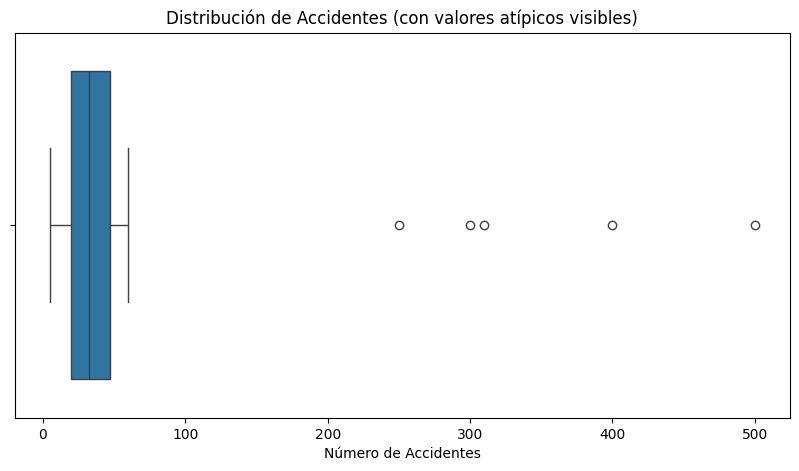

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Número de Accidentes")
plt.title("Distribución de Accidentes (con valores atípicos visibles)")
plt.show()


“Los valores extremos fueron visualizados pero no serán tratados como foco principal del análisis.”

Exportación de valores atípicos

Se creó un subconjunto con los registros que superan los 200 accidentes anuales.  
Este conjunto incluye todas las columnas originales y nuevas generadas durante la transformación.  
Fue exportado como `outliers_accidentes.csv` para permitir su análisis independiente.

In [130]:
outliers = df[df["Número de Accidentes"] > 200]
outliers.to_csv("outliers_accidentes.csv", index=False)


In [131]:
outliers.columns

Index(['Año', 'Región', 'Sector Económico', 'Empresa', 'Número de Accidentes',
       'High Alert', 'Risk Level', 'critical_zone'],
      dtype='object')

In [132]:
outliers.head()

,Año,Región,Sector Económico,Empresa,Número de Accidentes,High Alert,Risk Level,critical_zone
70,2020,Caribe,Transporte,Ferroandes,310,Yes,Critical,No
78,2020,Pacífica,Salud,TransCaribe,300,Yes,Critical,No
120,2021,Pacífica,Agroindustria,Educando SAS,500,Yes,Critical,No
185,2021,Pacífica,Agroindustria,Mineralco,400,Yes,Critical,No
244,2021,Caribe,Minería,Logística Express,250,Yes,Critical,No


# **DATA VISUALIZATION**
- Matplotplib
- Seaborn

<ipython-input-136-41cf574f8d05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Risk Level", order=["Low", "Medium", "High", "Critical"], palette="viridis")


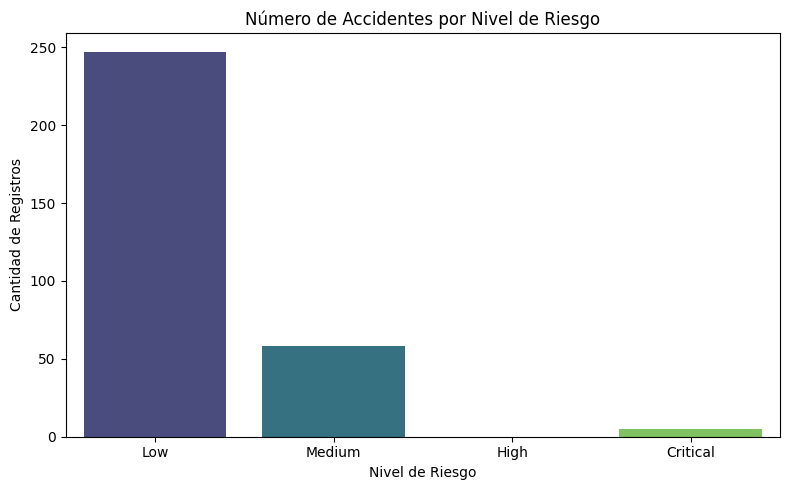

In [136]:
#Accidentes por nivel de riesgo (frecuencia)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Risk Level", order=["Low", "Medium", "High", "Critical"], palette="viridis")
plt.title("Número de Accidentes por Nivel de Riesgo")
plt.xlabel("Nivel de Riesgo")
plt.ylabel("Cantidad de Registros")
plt.tight_layout()
plt.show()


In [138]:
# Crear una copia temporal sin la categoría "Desconocido"
df_filtrado = df[df["Región"] != "Desconocido"]

<ipython-input-140-5aac3494ffa3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_filtrado, x="Región", y="Número de Accidentes", estimator="mean", palette="magma")


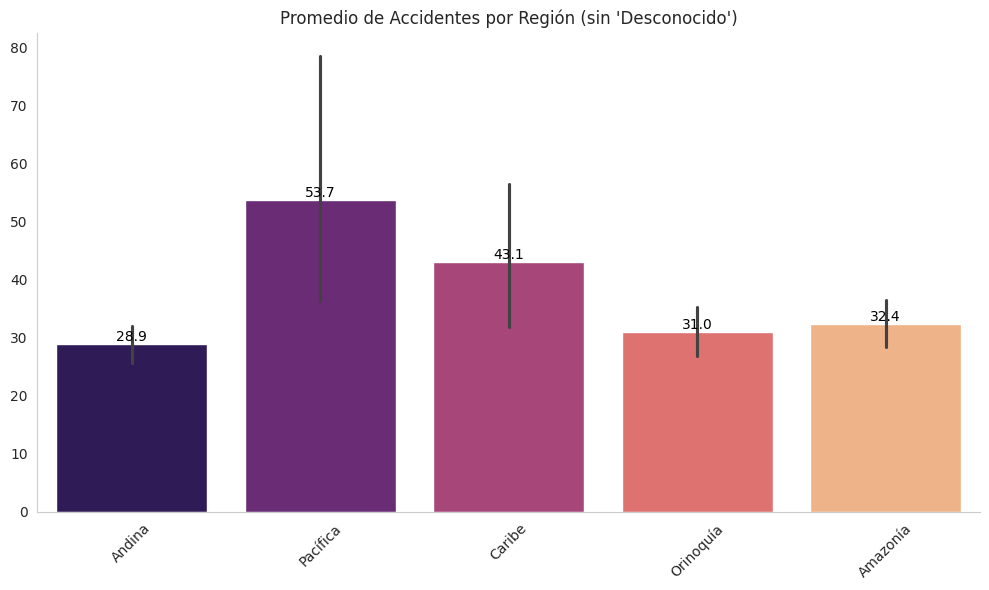

In [140]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Usar el DataFrame filtrado
ax = sns.barplot(data=df_filtrado, x="Región", y="Número de Accidentes", estimator="mean", palette="magma")

plt.title("Promedio de Accidentes por Región (sin 'Desconocido')")
plt.xlabel("")
plt.ylabel("")
sns.despine()
plt.grid(False)
plt.xticks(rotation=45)

# Anotar valores
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()